In [2]:
# magic code file tutorial ini, abaikan saja
%matplotlib inline
import matplotlib.pyplot as plt
from math import *

# Memodelkan Konsentrasi Obat

{cot intro} ini gilasih https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4618536/

## Model Satu Kompartemen

### Sekali Penggunaan

$$
\frac{dQ}{dt} = - KQ\\
Q = Q_0 e^{Kt}$$

$$Q_t = Q_{t-\Delta t} (1-K\Delta t)$$

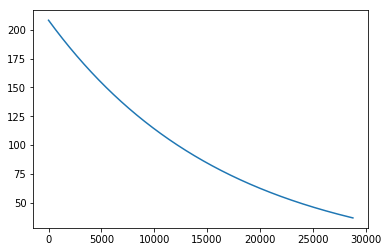

In [6]:
# inisialisasi variabel
WaktuParuh      = 3.2      #dalam jam
LamaSimulasi    = 8
VolPlasma       =  3000    #dalam mL
KonAspirinB     = [625000/VolPlasma]    #dalam mikrogram/mL

K  = -log(0.5)/WaktuParuh #konstanta eliminasi
dt = 1/3600

waktu        = range(1,int(LamaSimulasi/dt)+1)

for iterasi in waktu[:-1]:
    KonAspirinB.append( KonAspirinB[iterasi-1]*(1-K*dt))
    
#plotting
plt.plot(waktu,KonAspirinB)

### Penggunaan Berulang

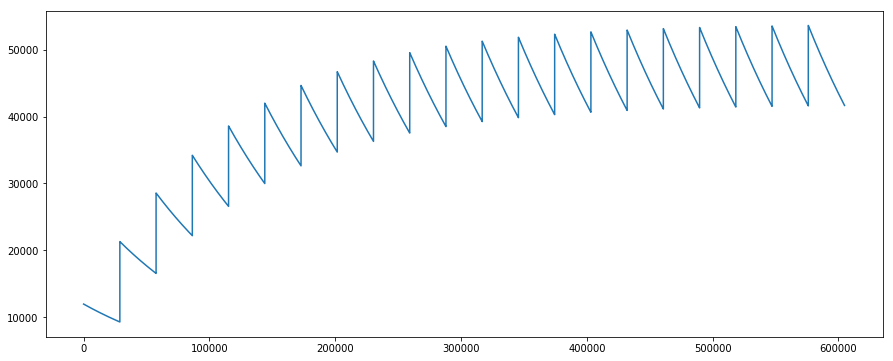

In [16]:
# inisialisasi variabel
WaktuParuh      = 22      #dalam jam
LamaSimulasi    = 168     #dalam jam
KonAspirinB     = [12000] #dalam mikrogram/mL

K  = -log(0.5)/WaktuParuh #konstanta eliminasi
dt = 1/3600

waktu    = range(1,int(LamaSimulasi/dt)+1)
interval = int(8/dt)

for iterasi in waktu[:-1]:
    KonAspirinB.append( KonAspirinB[iterasi-1]*(1-K*dt))
    
    if iterasi%interval==0:
        KonAspirinB[-1] += 12000 #penambahan
    
#plotting
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(waktu,KonAspirinB)

{penjelasan analitik}

## Model Dua Kompartemen

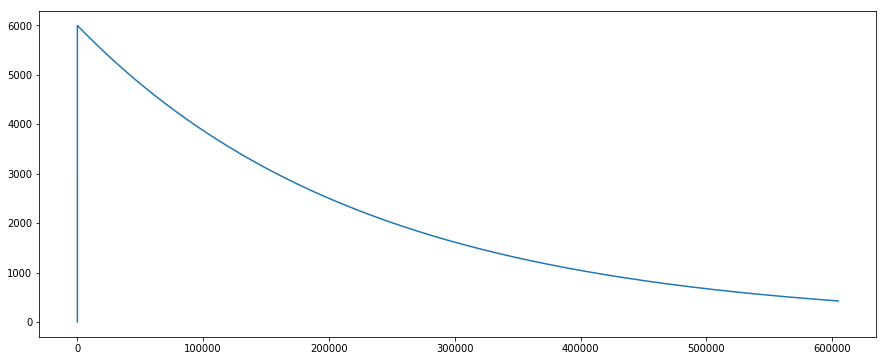

In [40]:
# inisialisasi variabel
WaktuParuh      = 22      #dalam jam
LamaSimulasi    = 168     #dalam jam
KonAspirinUsus  = 12000
KonAspirinPlasma= [0]     #dalam mikrogram/mL

K  = -log(0.5)/WaktuParuh #konstanta eliminasi
dt = 1/3600

waktu    = range(1,int(LamaSimulasi/dt)+1)
interval = int(8/dt)

for iterasi in waktu[:-1]:
    #konstanta * Vusus * (KonObatUsus - KonAspirinTubuh)
    masuk = 0.3 * 5000 * (KonAspirinUsus - KonAspirinPlasma[iterasi-1]) * dt
    
    KonAspirinUsus -= masuk
    
    hilang = KonAspirinPlasma[iterasi-1]*K*dt
    
    KonAspirinPlasma.append( KonAspirinPlasma[iterasi-1] - hilang + masuk)
        
#plotting
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(waktu,KonAspirinPlasma)

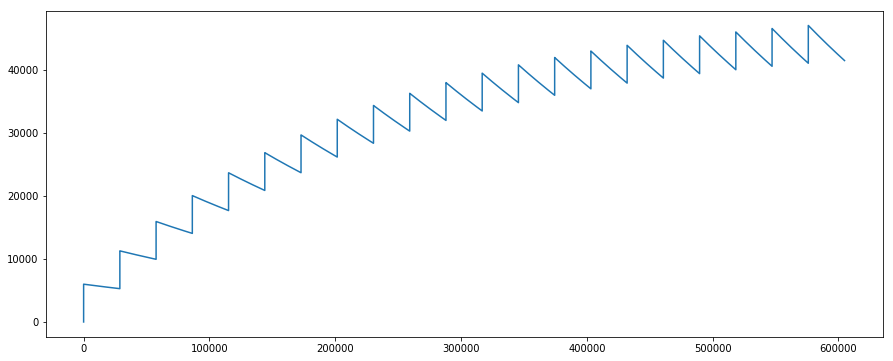

In [39]:
# inisialisasi variabel
WaktuParuh      = 22      #dalam jam
LamaSimulasi    = 168     #dalam jam
KonAspirinUsus  = 12000
KonAspirinPlasma= [0]     #dalam mikrogram/mL

K  = -log(0.5)/WaktuParuh #konstanta eliminasi
dt = 1/3600

waktu    = range(1,int(LamaSimulasi/dt)+1)
interval = int(8/dt)

for iterasi in waktu[:-1]:
    #konstanta * Vusus * (KonObatUsus - KonAspirinTubuh)
    masuk = 0.3 * 5000 * (KonAspirinUsus - KonAspirinPlasma[iterasi-1]) * dt
    
    KonAspirinUsus -= masuk
    
    hilang = KonAspirinPlasma[iterasi-1]*K*dt
    
    KonAspirinPlasma.append( KonAspirinPlasma[iterasi-1] - hilang + masuk)
    
    if iterasi%interval==0:
        KonAspirinUsus += 12000 #penambahan
#plotting
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(waktu,KonAspirinPlasma)

1. Develop a two-compartment model for one dose of aspirin.
2. Develop a two-compartment model for aspirin, where someone with a headache takes three aspirin tablets and 2 h later takes two more aspirin tablets.
3. In attempt to raise the concentration of a drug in the system to the minimum effective concentration quickly, sometimes doctors give a patient a loading dose, which is an initial dosage that is much higher than the maintenance dosage. A loading dose for Dilantin is three doses 400 mg, 300 mg, and 300 mg 2h apart. Twenty-four hours after the loading dose, normal dosage of 100 mg every 8 h begins. Develop a model for this dosage regime.
4. Develop a two-compartment model for Dilantin, where the rate of change of absorption from the stomach to the blood serum is proportional to the amount of drug in the stomach.
5. Develop a two-compartment model for Dilantin, where the rate of change of absorption from the stomach to the blood serum is proportional to the volume of the stomach and to the difference of the drug concentrations in the stomach and serum. Assume the volume of the stomach is 500 mL.
6. Develop a two-compartment model for a pediatric dosage of Dilantin that includes the mass of the patient. The initial dose is 5 mg/kg per day in two or three equally divided doses. The maintenance dosage is usually 4 to 8 mg/kg per day.
7. Develop a model for vancomycin HCI, which is a treatment for serious infections by susceptible strains of methicillin-resistant staphylococci in penicillin-allergic patients. The drug is administered by IV infusion. The intravenous dose is usually 2 g divided either as 500 mg every 6 h or 1 g every 12 h, and the rate is no more than 10 mg/min or over a period of at least 50 min, whichever is longer. When kidney function is normal, multiple intravenous dosing of 1 g results in mean plasma concentrations of about 63 μg/mL immediately after infusion, 23 μg/mL in 2 h, and 8 μg/mL 11 h after infusion. In such patients, the mean elimination half-life from plasma is 4 to 6 h. The mean plasma clearance is approximately 0.058 L/kg/h (liter of drug per kilogram of patient mass each hour), while the mean renal clearance is about 0.048 L/kg/h (Hospira 2010). Thus, include the mass of the patient in the model.
8. Repeat Pro–ect 7 for ”atients with renal dysfunction in which the average half-life of elimination is 7.5 da (Hospira 2010).
9. Develop a model for Vancocin HCI in which the patient initially has normal kidney function (see Project 7). However, at the start of the third day, one of the patientms kidneys stops functioning; and the elimination rate becomes half its previous value. Consider using a step function.
10. Do Project 7 for children, where the dosage is 10 mg/kg every 6 h, and the rate of administration is over a period of at least 60 min (Hospira 2010).
11. Do Project 7 for neonates and young infants. The initial dose is 15 mg/kg. Thereafter, the dosage is 10 mg/kg every 12 h for neonates in their first week of life and afterward, up to age of 1 mo, every 8 h. Administration is more than 60 min (Hospira 2010).
12. Model drug dosage of aspirin for arthritis, where the initial dose is 3 g/da in divided doses. The dosage can be increased. Relief usually occurs at plasma levels of 20 to 30 mg per 100 mL. The plasma half-life of aspirin increases
13. with dosage, so that a dose of 1 g has a half-life of about 5 h and a dose of 2 g has a half-life of about 9 h. Considering the information about mass in Project 7, do any of the previous projects except one involving children or infants, accounting for the mass of a male patient.
14. By consulting a ”harmacy reference or website, such as http://www.nlm.nih.gov/medlineplus/druginformation.html, obtain relevant information about some drug. Model the dosage of this drug.